In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [87]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

In [88]:
#Perform API Calls
url="http://api.openweathermap.org/data/2.5/weather/"
params={}
params['APPID'] = api_keys.api_key
params['units'] = 'imperial'
#Perform a weather check on each city using a series of successive API calls.
i=0
queryResult={}
for city in cities:
    print('Processing record ', str(i), '| ', city)
    i = i+1
    params['q']=city
    try:
        response = requests.request("GET", url, params=params)
        responseJson = response.json()
        if responseJson.get('cod') != None and responseJson.get('cod') == 404:
            print("City not found. Skipping...")
            continue
        queryResult[city] = response.json() 
    except:
        print("Exception during the API call, skipping city")

#Include a print log of each city as it'sbeing processed (with the city number and city name).

Processing record  0 |  bredasdorp
Processing record  1 |  kondol
Processing record  2 |  mataura
Processing record  3 |  taolanaro
Processing record  4 |  punta arenas
Processing record  5 |  barentsburg
Processing record  6 |  kaitangata
Processing record  7 |  katsuura
Processing record  8 |  trogir
Processing record  9 |  batagay
Processing record  10 |  rikitea
Processing record  11 |  qaqortoq
Processing record  12 |  bensonville
Processing record  13 |  wencheng
Processing record  14 |  hofn
Processing record  15 |  busselton
Processing record  16 |  kapaa
Processing record  17 |  avarua
Processing record  18 |  albany
Processing record  19 |  albanel
Processing record  20 |  olinda
Processing record  21 |  sao joao da barra
Processing record  22 |  mahebourg
Processing record  23 |  marcona
Processing record  24 |  meulaboh
Processing record  25 |  cape town
Processing record  26 |  vanimo
Processing record  27 |  college
Processing record  28 |  ushuaia
Processing record  29 |

Processing record  238 |  savinka
Processing record  239 |  alofi
Processing record  240 |  shingu
Processing record  241 |  ilhabela
Processing record  242 |  saldanha
Processing record  243 |  pisco
Processing record  244 |  chuy
Processing record  245 |  plettenberg bay
Processing record  246 |  hay river
Processing record  247 |  aklavik
Processing record  248 |  tura
Processing record  249 |  sorong
Processing record  250 |  half moon bay
Processing record  251 |  nome
Processing record  252 |  itoman
Processing record  253 |  lagoa
Processing record  254 |  lebu
Processing record  255 |  khonuu
Processing record  256 |  tasiilaq
Processing record  257 |  elizabeth city
Processing record  258 |  longhua
Processing record  259 |  saint-joseph
Processing record  260 |  monchegorsk
Processing record  261 |  haimen
Processing record  262 |  cidreira
Processing record  263 |  isangel
Processing record  264 |  nadvoitsy
Processing record  265 |  muyezerskiy
Processing record  266 |  zha

Processing record  472 |  geraldton
Processing record  473 |  bawku
Processing record  474 |  paita
Processing record  475 |  sao jose da coroa grande
Processing record  476 |  miraflores
Processing record  477 |  klyuchi
Processing record  478 |  vila franca do campo
Processing record  479 |  sohag
Processing record  480 |  khani
Processing record  481 |  vagamo
Processing record  482 |  vermillion
Processing record  483 |  ucluelet
Processing record  484 |  dalvik
Processing record  485 |  matara
Processing record  486 |  nuoro
Processing record  487 |  yulara
Processing record  488 |  puerto madryn
Processing record  489 |  karratha
Processing record  490 |  rio grande
Processing record  491 |  togur
Processing record  492 |  shellbrook
Processing record  493 |  umzimvubu
Processing record  494 |  weston
Processing record  495 |  bulgan
Processing record  496 |  wewak
Processing record  497 |  lolua
Processing record  498 |  kirakira
Processing record  499 |  sangar
Processing recor

In [90]:
### Convert Raw Data to DataFrame
#Export the city data into a .csv.
import csv
with open('cityData.csv', 'w') as csvfile:
    fieldnames = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for city,cityresult in queryResult.items():
        if cityresult.get('cod') != 200:
            continue
        writer.writerow({
            'City':city,
            'Cloudiness':cityresult['clouds']['all'],
            'Country':cityresult['sys']['country'],
            'Date': cityresult['dt'],
            'Humidity':cityresult['main']['humidity'],
            'Lat':cityresult['coord']['lat'],
            'Lng':cityresult['coord']['lon'],
            'Max Temp':cityresult['main']['temp_max'],
            'Wind Speed':cityresult['wind']['speed']
        })


In [91]:
#Create and Display the DataFrame

city_df = pd.read_csv('cityData.csv')
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,24,ZA,1546570800,93,-34.53,20.04,57.20,4.70
1,kondol,92,RU,1546573128,91,52.82,45.06,18.90,12.24
2,mataura,76,NZ,1546573128,71,-46.19,168.86,61.88,20.51
3,punta arenas,75,CL,1546567200,76,-53.16,-70.91,50.00,23.04
4,kaitangata,92,NZ,1546573129,83,-46.28,169.85,56.21,16.82


In [92]:
#Plotting the Data

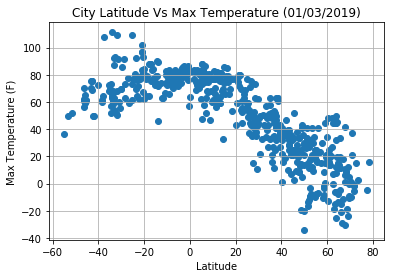

In [97]:
# Latitude vs. Humidity Plot#Latitude vs. Temperature Plot

plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o")
plt.title("City Latitude Vs Max Temperature (01/03/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("latitudeVsTemperature.png")
# Show plot
plt.show()


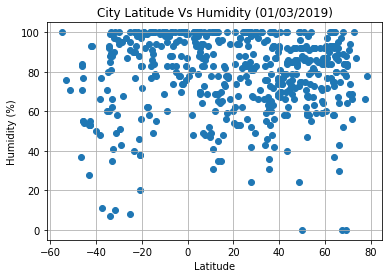

In [98]:
# Latitude vs. Humidity Plot

plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o")
plt.title("City Latitude Vs Humidity (01/03/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("latitudeVsHumidity.png")
# Show plot
plt.show()

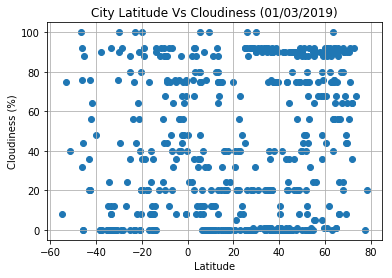

In [99]:
# Latitude vs. Cloudiness Plot

plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")
plt.title("City Latitude Vs Cloudiness (01/03/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("latitudeVsCloudiness.png")
# Show plot
plt.show()

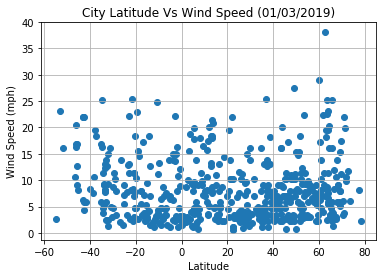

In [100]:
# Latitude vs. Wind Speed Plot

plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o")
plt.title("City Latitude Vs Wind Speed (01/03/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("latitudeVsWindSpeed.png")
# Show plot
plt.show()